# Learning Curves

To diagnose whether a model converges nicely without underfitting or overfitting we plot learning curves. On the y-axis we usually plot the loss and on the y-axis some hyperparameter.

# Hyperparameters

Hyperparameters are parameters that we set prior to learning, as opposed to other parameters that are learned during learning such as the coefficients for Linear Regression. Examples of hyper parameters are (when applicable):
- learning rate
- the number of epochs (passes over the data set) used for training
- the order of polynomials
- the maximum depth of a decision tree
- k for k-Nearest Neighbors
- the number of features when using a fixed strategy to add features
- regularization parameters (regularizations are ways to prevent overfitting)

In [1]:
from ml import *
data = dam()

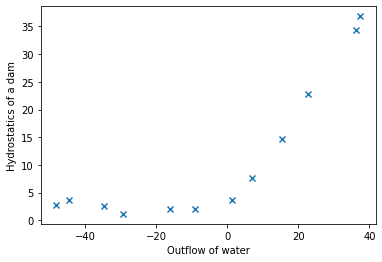

In [2]:
data.plot(marker = 'x')

Inspecting the data reveals that a higher-order polynomial is required for this dataset. But it is difficult to determine the degree of the polynomial. What we will do is we will 'sweep' the `degree` hyperparameter that sets the degree for the polynomial, and create a list of learned models.  collect the loss for each setting and create a plot.

Because we repeat the same process over and over, it is more convenient to define a function that fits a model with the required number of polynomials and return the model.

In [3]:
def fit_poly(degree=1):
    data = dam(degree=degree, scale=True)
    model = linear_regression_ne(data)
    model.train(verbose=False, bar=False) # turn off output to the console
    return model

# Comprehensions

If you are not yet familiar with Python's Comprehensions, it is a short way to describe a collection of elements. In this case, a List Comprehension is used to create a List of models. The `for` loop iterates over the ranges 1 through 19 (the upperbound 20 in range is exclusive), and for every degree the fit_poly function is called and the result stored in the List.

Likewise, we can use a List Comprehension to loop over the models en extract a list of training loss, validation loss and the degree used for the polynomials.

In [17]:
models = [ fit_poly(degree) for degree in range(1,12) ]
train_loss = [ m.train_loss() for m in models ]
valid_loss = [ m.valid_loss() for m in models ]
degrees = [ m.data.degree for m in models ]

When we look at the training loss we should see that if we add more information the loss is lower. So it may appear that more complex a model is the better it performs.

In [23]:
train_loss

[536.9737558826139,
 24.44786767046427,
 17.192770930717984,
 7.291491053981278,
 5.0039069783124885,
 4.753270635063327,
 0.935502622524722,
 0.6933657379871574,
 0.5701988534985516,
 0.10831135833332922,
 8.87501256101205e-25]

Now we plot a graph. The most commonly used and most extensive library for plotting is MatplotLib, from which the PyPlot module is imported by ML as `plt`.

In [21]:
def plot(x, series, ylabel='loss', xlabel='epochs', yscale = None):
    for label,y in series.items():
        plt.plot(x, y, label=label)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.ylim((0,2000))
    if yscale is not None:
        plt.yscale(yscale)
    plt.legend()
    plt.show()

We then create a plot not just with the training loss, but also with the validation loss. On the x-axis is the degree of the polynomials. And we see that although the training loss keeps improving, the validation loss goes up after degree=3. Since the validation set consists of data that was not used in training, this is an unbiased sample to validate the model. The minimum is usually where the model performs best.

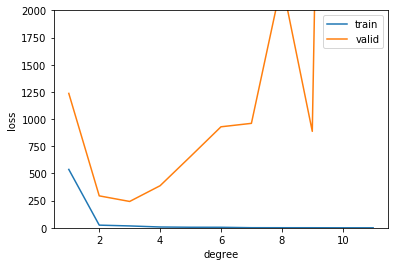

In [22]:
plot(degrees, {'train':train_loss, 'valid':valid_loss}, xlabel='degree')